In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
collateral = 463
credit = 309

max_profit = credit 
max_loss = collateral

profit_chance = 0.58

In [10]:
n_iterations = 50

In [11]:
dice_rolls = np.random.uniform(0,1, size=n_iterations)

(array([2., 6., 1., 1., 2., 2., 0., 5., 5., 1., 1., 3., 2., 2., 3., 1., 4.,
        2., 3., 4.]),
 array([0.00551529, 0.05417253, 0.10282976, 0.15148699, 0.20014423,
        0.24880146, 0.2974587 , 0.34611593, 0.39477316, 0.4434304 ,
        0.49208763, 0.54074487, 0.5894021 , 0.63805934, 0.68671657,
        0.7353738 , 0.78403104, 0.83268827, 0.88134551, 0.93000274,
        0.97865997]),
 <BarContainer object of 20 artists>)

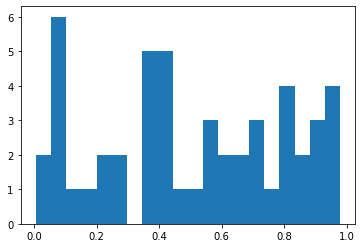

In [12]:
plt.hist(dice_rolls, bins=20)

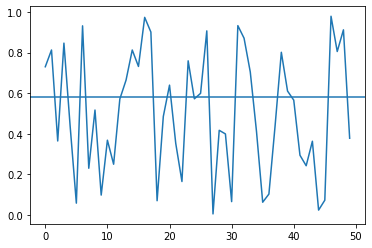

In [13]:
plt.plot(dice_rolls)
plt.axhline(profit_chance)

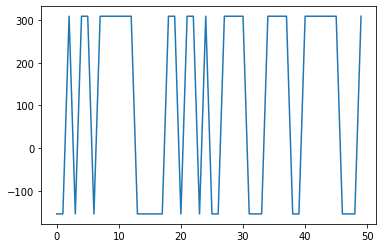

In [14]:
profit = np.zeros((n_iterations))
for day, dice_roll in enumerate(dice_rolls):
    if dice_roll > profit_chance:
        profit[day] = -max_loss
    else:
        profit[day] = credit
plt.plot(profit)

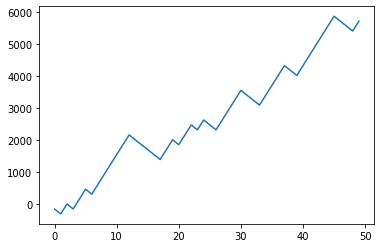

In [15]:
plt.plot(np.cumsum(profit))

In [20]:
max_loss

463

In [4]:
def realization(n_iterations, profit_chance, max_loss, credit, plot=False):
    dice_rolls = np.random.uniform(0,1, size=n_iterations)
    profit = np.zeros((n_iterations))
    for day, dice_roll in enumerate(dice_rolls):
        if dice_roll > profit_chance:
            profit[day] = -max_loss
        else:
            profit[day] = credit
            
    if plot:
        plt.hist(dice_rolls, bins=20)
        plt.figure()
        plt.plot(dice_rolls)
        plt.axhline(profit_chance)
        plt.figure()
        plt.plot(profit)
        plt.figure()
        plt.plot(np.cumsum(profit))
    
    return profit

In [2]:
def get_realizations(n_realizations = 10000, n_iterations=1000, profit_chance=0.92, credit=20, max_loss=452):
    # max_loss = collateral - credit
    print(profit_chance, credit, max_loss)
    plt.figure()
    realizations = np.zeros((n_realizations, n_iterations))
    for r in range(n_realizations):
        realizations[r] = np.cumsum(realization(n_iterations, profit_chance, max_loss, credit))
        if r % 100 == 0:
            print(r, end='\r')
            plt.plot(realizations[r])
    plt.figure()
    plt.hist(realizations[:,-1], bins=25)
    plt.axvline(np.mean(realizations[:,-1]),c='r')
    return realizations

0.66 264 452


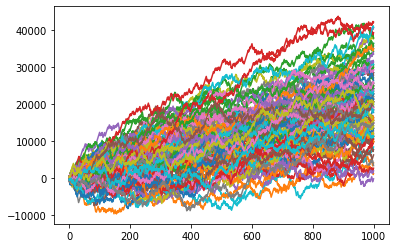

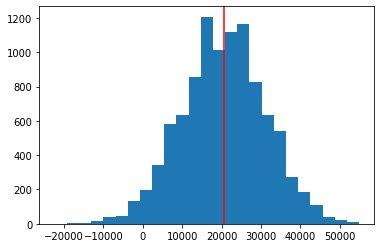

In [34]:
realizations = get_realizations(n_realizations = 10000, n_iterations=1000, 
                                profit_chance=0.66, credit=264, max_loss=452)

0.6 386 709


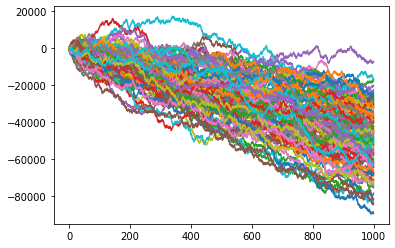

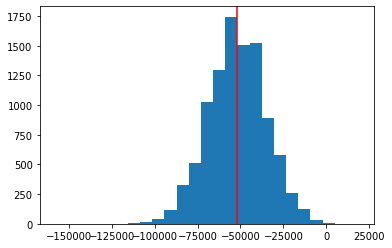

In [38]:
realizations = get_realizations(profit_chance=0.6, credit=386, max_loss=709)

0.71 305 654


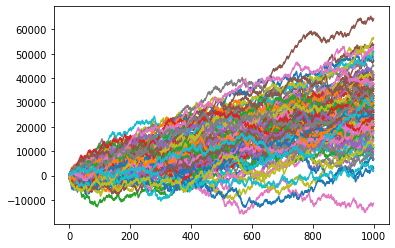

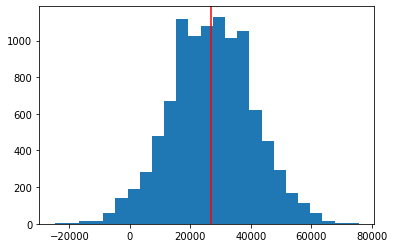

In [40]:
realizations = get_realizations(profit_chance=0.71, credit=305, max_loss=654)

0.82 384 690


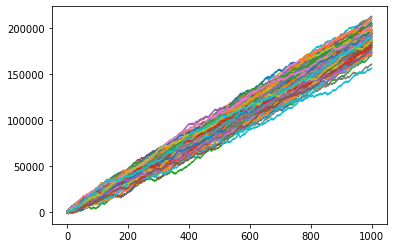

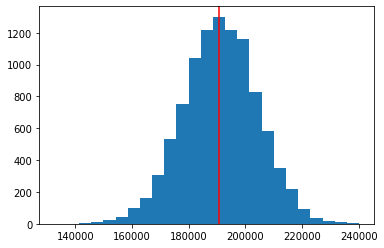

In [46]:
realizations = get_realizations(profit_chance=0.82, credit=384, max_loss=690)

0.67 245 400


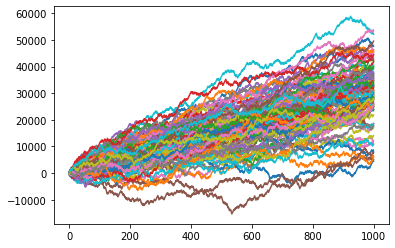

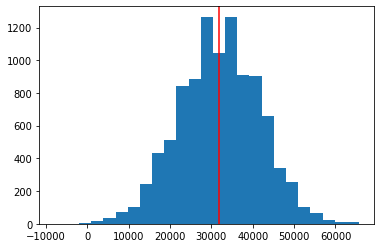

In [7]:
realizations = get_realizations(profit_chance=0.67, credit=245, max_loss=400)

In [9]:
798/31.

25.741935483870968

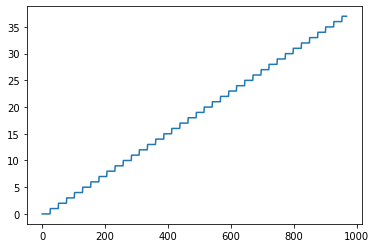

In [17]:
gains = np.arange(0,30000,31)
plt.plot(gains // 798)
gains *= gains // 798

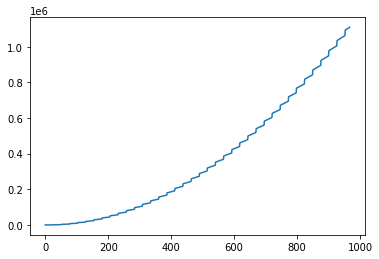

In [15]:
plt.plot(gains)

0.73 100 250


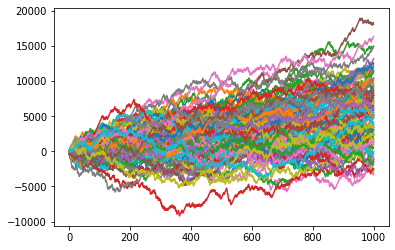

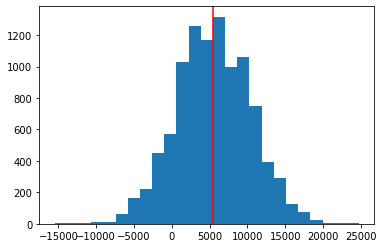

In [8]:
realizations = get_realizations(profit_chance=0.73, credit=100, max_loss=250)